In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
nursery = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\nursery.csv')
nursery

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [4]:
encodings = {
    'parents': {'usual': 1, 'pretentious': 2, 'great_pret': 3},
    'has_nurs': {'proper': 1, 'less_proper': 2, 'improper': 3, 'critical': 4, 'very_crit': 5},
    'form': {'complete': 1, 'completed': 2, 'foster': 3, 'incomplete': 4},
    'children': {'1': 1, '2': 2, '3': 3, 'more': 4},
    'housing': {'convenient': 1, 'less_conv': 2, 'critical': 3},
    'finance': {'convenient': 1, 'inconv': 2},
    'social': {'nonprob': 1, 'slightly_prob': 2, 'problematic': 3},
    'health': {'not_recom': 1, 'priority': 2, 'recommended': 3},
    'final evaluation': {'not_recom': 1, 'recommend': 2, 'very_recom': 3, 'priority': 4, 'spec_prior': 5}
}

for col, encoding in encodings.items():
    nursery[col] = nursery[col].map(encoding)

nursery

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,1,1,1,1,1,1,1,3,2
1,1,1,1,1,1,1,1,2,4
2,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,2,3,2
4,1,1,1,1,1,1,2,2,4
...,...,...,...,...,...,...,...,...,...
12955,3,5,3,4,3,2,2,2,5
12956,3,5,3,4,3,2,2,1,1
12957,3,5,3,4,3,2,3,3,5
12958,3,5,3,4,3,2,3,2,5


In [5]:
scaler = StandardScaler()
features = nursery.drop('final evaluation', axis = 1)
features = scaler.fit_transform(features)

evaluations = nursery['final evaluation']
evaluations = tf.keras.utils.to_categorical(evaluations - 1, num_classes = 5)

features_train, features_test, evaluations_train, evaluations_test = train_test_split(features, evaluations, test_size = 0.2, random_state = 42)

In [6]:
model = Sequential()

model.add(Dense(64, input_dim = features_train.shape[1], activation = 'relu'))
model.add(Dropout(0.2)) 

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
model_checkpoint = ModelCheckpoint('nursery_decision_model.keras', monitor = 'val_loss', save_best_only = True)

In [8]:
history = model.fit(features_train, evaluations_train, epochs = 100, batch_size = 32, validation_data = (features_test, evaluations_test), callbacks = [early_stopping, model_checkpoint])

AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
Epoch 1/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6709 - loss: 0.8073 - val_accuracy: 0.9252 - val_loss: 0.1923
Epoch 2/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9006 - loss: 0.2424 - val_accuracy: 0.9379 - val_loss: 0.1587
Epoch 3/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9146 - loss: 0.1985 - val_accuracy: 0.9410 - val_loss: 0.1475
Epoch 4/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9262 - loss: 0.1780 - val_accuracy: 0.9545 - val_loss: 0.1259
Epoch 5/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9302 - loss: 0.1637 - val_accuracy: 0.9568 - val_loss: 0.1206
Epoch 6/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9403 - loss: 0.1460 - val_accuracy: 0.9587 - val_loss: 0.1130
Epoch 7/100
324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9424 - loss: 0.1345 - val_accuracy: 0.9649 - val_loss: 0.1045
Epoch 8/100
324/324 ━━━━━━━━━━━

In [9]:
loss, accuracy = model.evaluate(features_test, evaluations_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9895 - loss: 0.0285
Test Loss: 0.06599466502666473
Test Accuracy: 0.9880401492118835


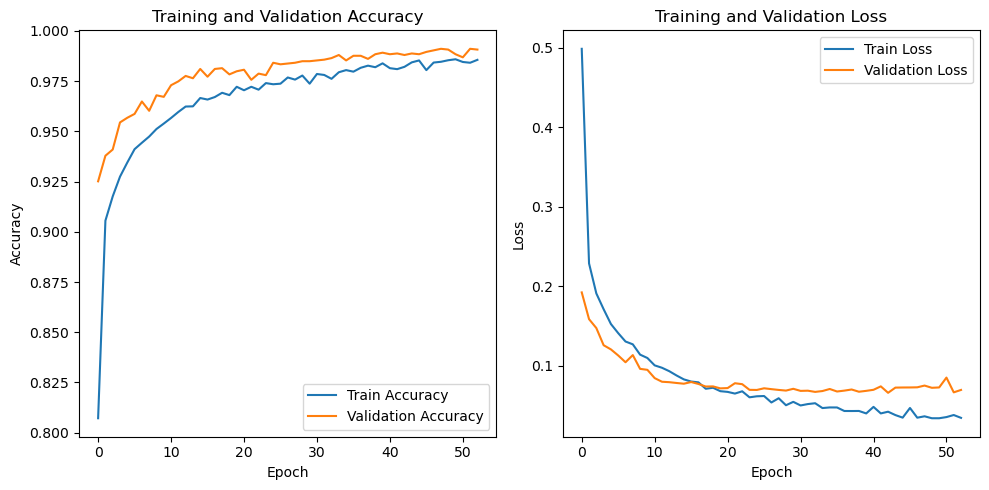

In [10]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


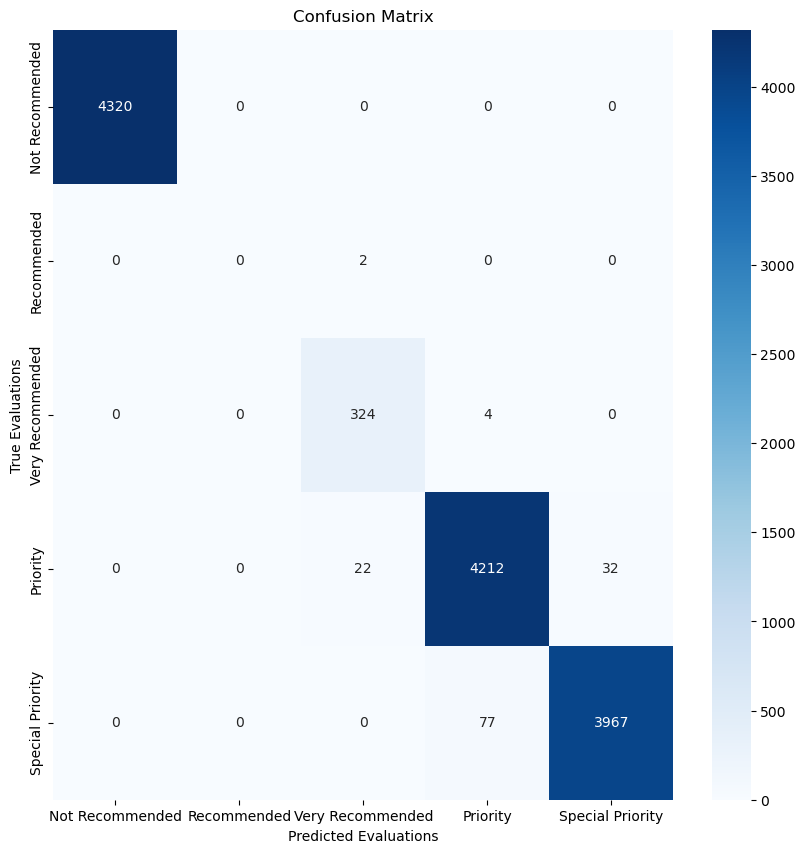

In [11]:
evaluations_pred = model.predict(features)
evaluations_pred_classes = np.argmax(evaluations_pred, axis = 1)
evaluations_true = np.argmax(evaluations, axis = 1)

conf_matrix = confusion_matrix(evaluations_true, evaluations_pred_classes)

plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Not Recommended', 'Recommended', 'Very Recommended', 'Priority', 'Special Priority'], yticklabels = ['Not Recommended', 'Recommended', 'Very Recommended', 'Priority', 'Special Priority'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Evaluations')
plt.ylabel('True Evaluations')
plt.show()